https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Original Data

In [2]:
df = pd.read_csv(r"C:\Users\Saniya\SANIYA\Projects\IrisClassification\Iris\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

Data Pre-processing

In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

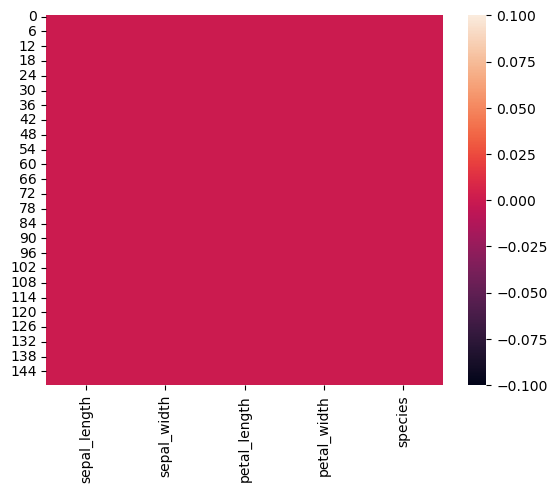

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.duplicated().sum()

3

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(147, 5)

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
for i in df.columns.tolist():
    print(f"#Unique values in {i}: {df[i].nunique()}")

#Unique values in sepal_length: 35
#Unique values in sepal_width: 23
#Unique values in petal_length: 43
#Unique values in petal_width: 22
#Unique values in species: 3


In [14]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='species', ylabel='count'>

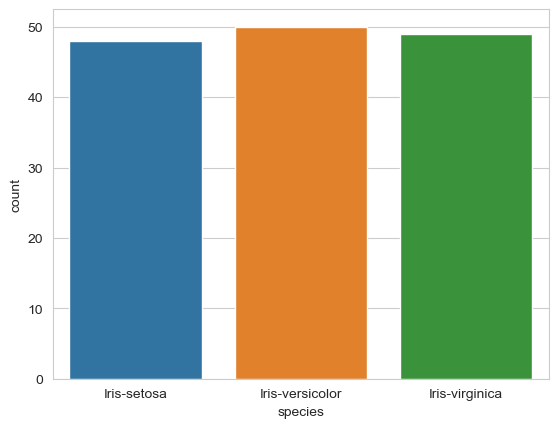

In [15]:
sns.countplot(x='species', data=df)

Categorical Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df['species'] = le.fit_transform(df['species'])

In [19]:
unique_species = df['species'].unique()

In [20]:
print(f"Encoded species values: \n{unique_species}")

Encoded species values: 
[0 1 2]


In [21]:
X = df.drop(['species'], axis=1)
y = df['species']

In [22]:
print(f"X.shape: {X.shape}")
print(f"X.columns: {X.columns}")

X.shape: (147, 4)
X.columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [23]:
print(f"y.shape: {y.shape}")
print(f"y.name: {y.name}")

y.shape: (147,)
y.name: species


Train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (102, 4)
y_train.shape: (102,)
X_test.shape: (45, 4)
y_test.shape: (45,)


In [27]:
y_train.value_counts()

0    37
2    34
1    31
Name: species, dtype: int64

Model Implementation & Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [59]:
def implement(model, X_train, X_test, y_train, y_test):
    
    ### Implementation ###
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    
    ### Evaluation ###
    
    # Confusion Matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_train_df = pd.DataFrame(cr_train).T
    
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    cr_test_df = pd.DataFrame(cr_test).T
    
    
    # Plotting
    fig, ax = plt.subplots(2, 2, figsize=(12,9))
    
    # Train set
    sns.heatmap(cm_train, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], annot=True, square=True, ax=ax[0, 0])
    ax[0, 0].set_xlabel('Predicted')
    ax[0, 0].set_ylabel('Actual')
    ax[0, 0].set_title('Train Confusion Matrix')
    
    ax[0, 1].axis('off')
    table = ax[0, 1].table(cellText = cr_train_df.values, colLabels = cr_train_df.columns, rowLabels = cr_train_df.index, cellLoc='center', loc='center')
    ax[0, 1].set_title('Train Classification Report')
    
    # Test set
    sns.heatmap(cm_test, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], annot=True, square=True, ax=ax[1, 0])
    ax[1, 0].set_xlabel('Predicted')
    ax[1, 0].set_ylabel('Actual')
    ax[1, 0].set_title('Test Confusion Matrix')
    
    ax[1, 1].axis('off')
    table = ax[1, 1].table(cellText = cr_test_df.values, colLabels = cr_test_df.columns, rowLabels = cr_test_df.index, cellLoc='center', loc='center')
    ax[1, 1].set_title('Test Classification Report')
    
    plt.tight_layout()
    plt.show()
    
    
    ### Final return: Model score ###
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    
    f1_train = cr_train['weighted avg']['f1-score']
    f1_test = cr_test['weighted avg']['f1-score']
    
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    model_score = [precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, acc_train, acc_test]
    return model_score

In [62]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'F1 Train', 'F1 Test', 'Accuracy Train', 'Accuracy Test'])

1. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr_model = LogisticRegression(max_iter=10000)

In [51]:
lr_model.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 10000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None}

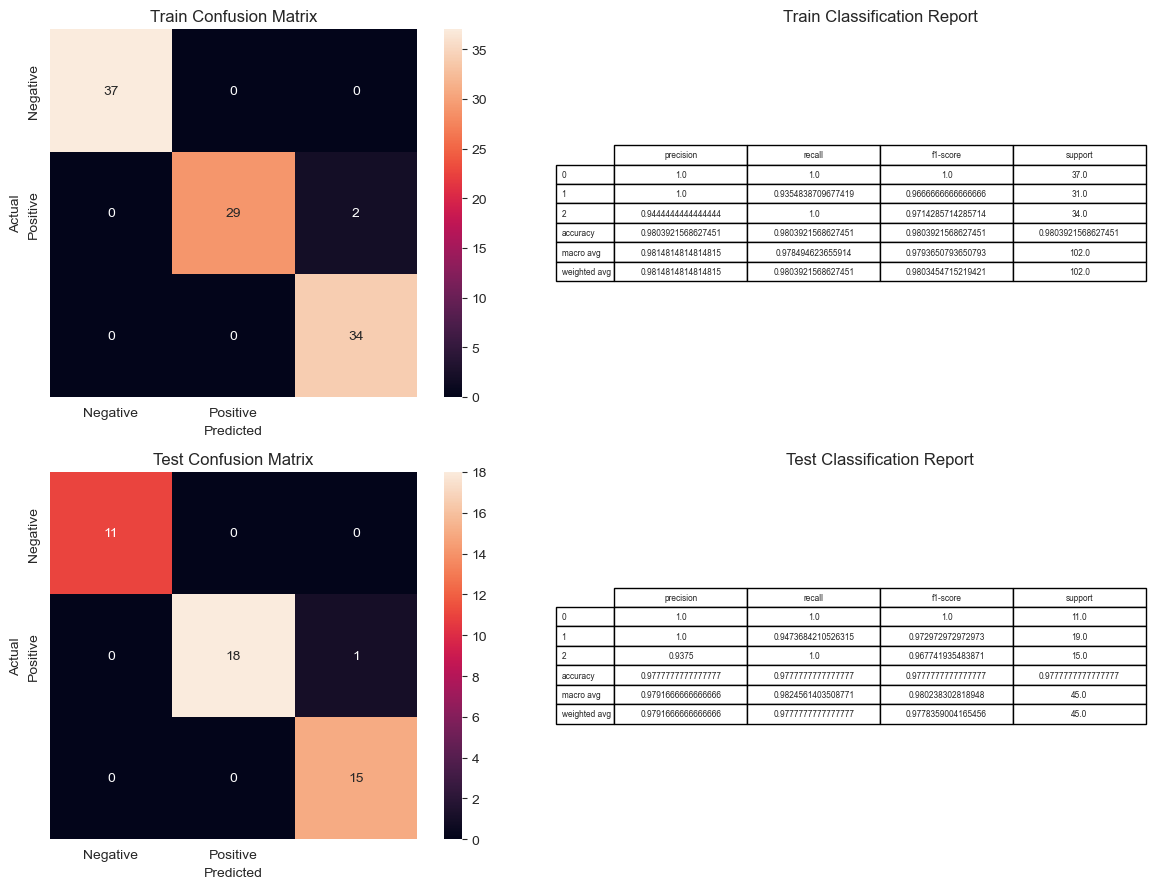

In [60]:
lr_score = implement(lr_model, X_train, X_test, y_train, y_test)

In [64]:
score['Logistic Regression'] = lr_score
score

,Logistic Regression
Precision Train,0.981481
Precision Test,0.979167
Recall Train,0.980392
Recall Test,0.977778
F1 Train,0.980345
F1 Test,0.977836
Accuracy Train,0.980392
Accuracy Test,0.977778


2. Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt_model = DecisionTreeClassifier(random_state=1)

In [70]:
dt_model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 1,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

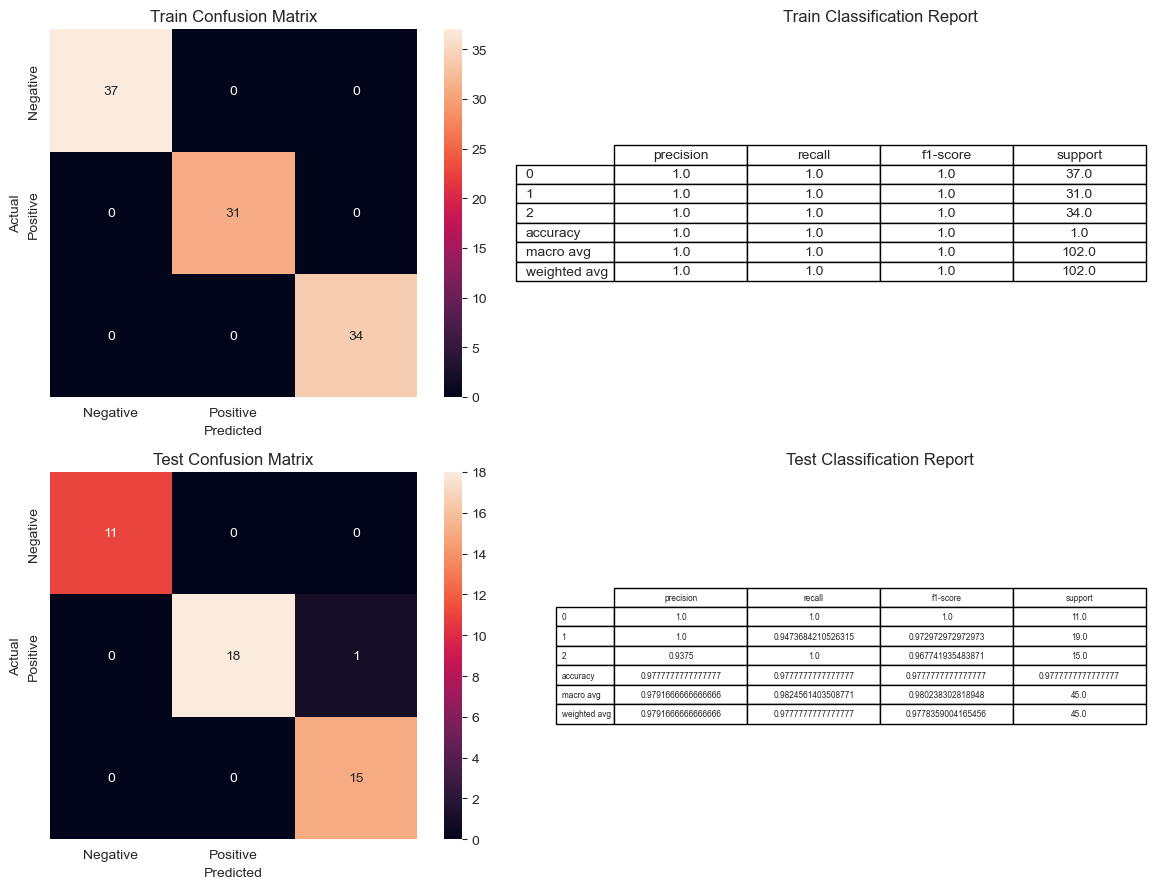

In [71]:
dt_score = implement(dt_model, X_train, X_test, y_train, y_test)

In [72]:
score['Decision Tree'] = dt_score
score

,Logistic Regression,Decision Tree
Precision Train,0.981481,1.000000
Precision Test,0.979167,0.979167
Recall Train,0.980392,1.000000
Recall Test,0.977778,0.977778
F1 Train,0.980345,1.000000
F1 Test,0.977836,0.977836
Accuracy Train,0.980392,1.000000
Accuracy Test,0.977778,0.977778


3. Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_model = RandomForestClassifier(random_state=1)

In [78]:
rf_model.__dict__

{'base_estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0}

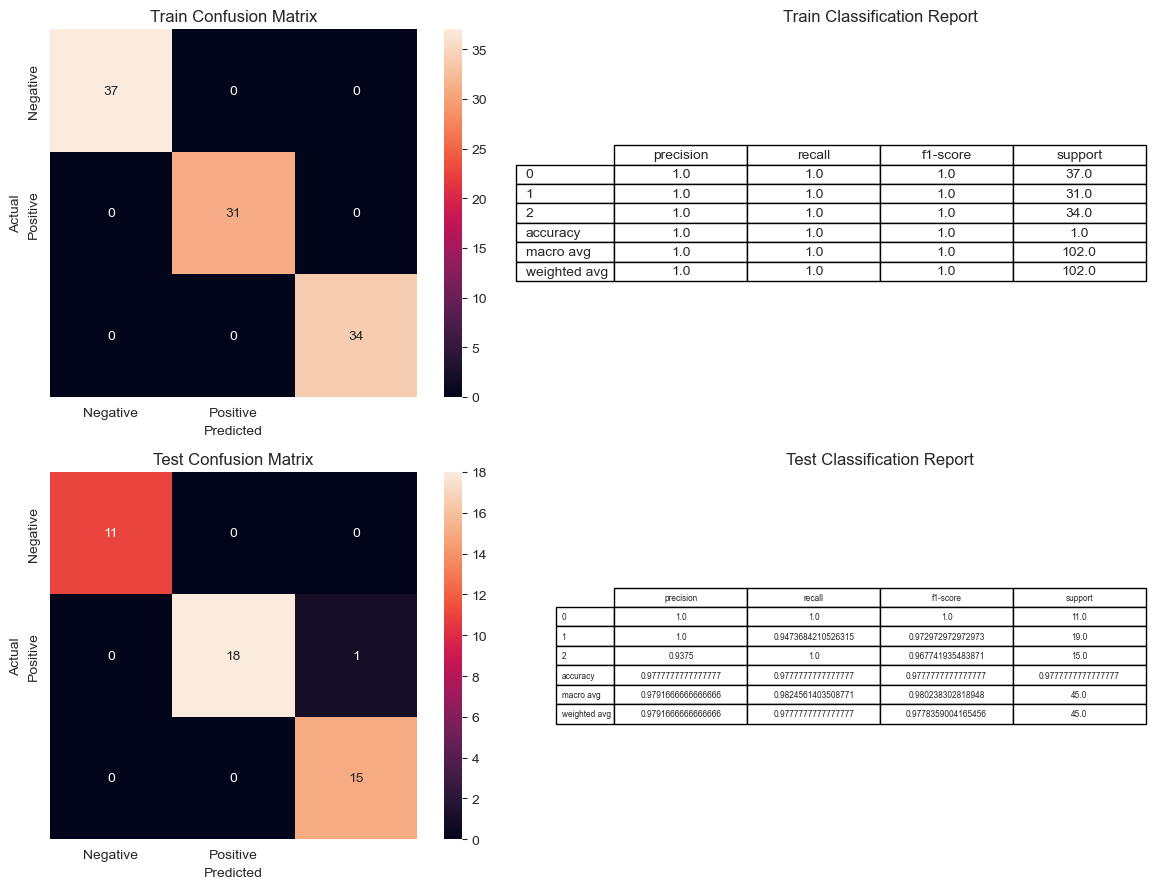

In [79]:
rf_score = implement(rf_model, X_train, X_test, y_train, y_test)

In [80]:
score['Random Forest'] = rf_score
score

,Logistic Regression,Decision Tree,Random Forest
Precision Train,0.981481,1.000000,1.000000
Precision Test,0.979167,0.979167,0.979167
Recall Train,0.980392,1.000000,1.000000
Recall Test,0.977778,0.977778,0.977778
F1 Train,0.980345,1.000000,1.000000
F1 Test,0.977836,0.977836,0.977836
Accuracy Train,0.980392,1.000000,1.000000
Accuracy Test,0.977778,0.977778,0.977778


4. SVM

In [82]:
from sklearn.svm import SVC

In [84]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)

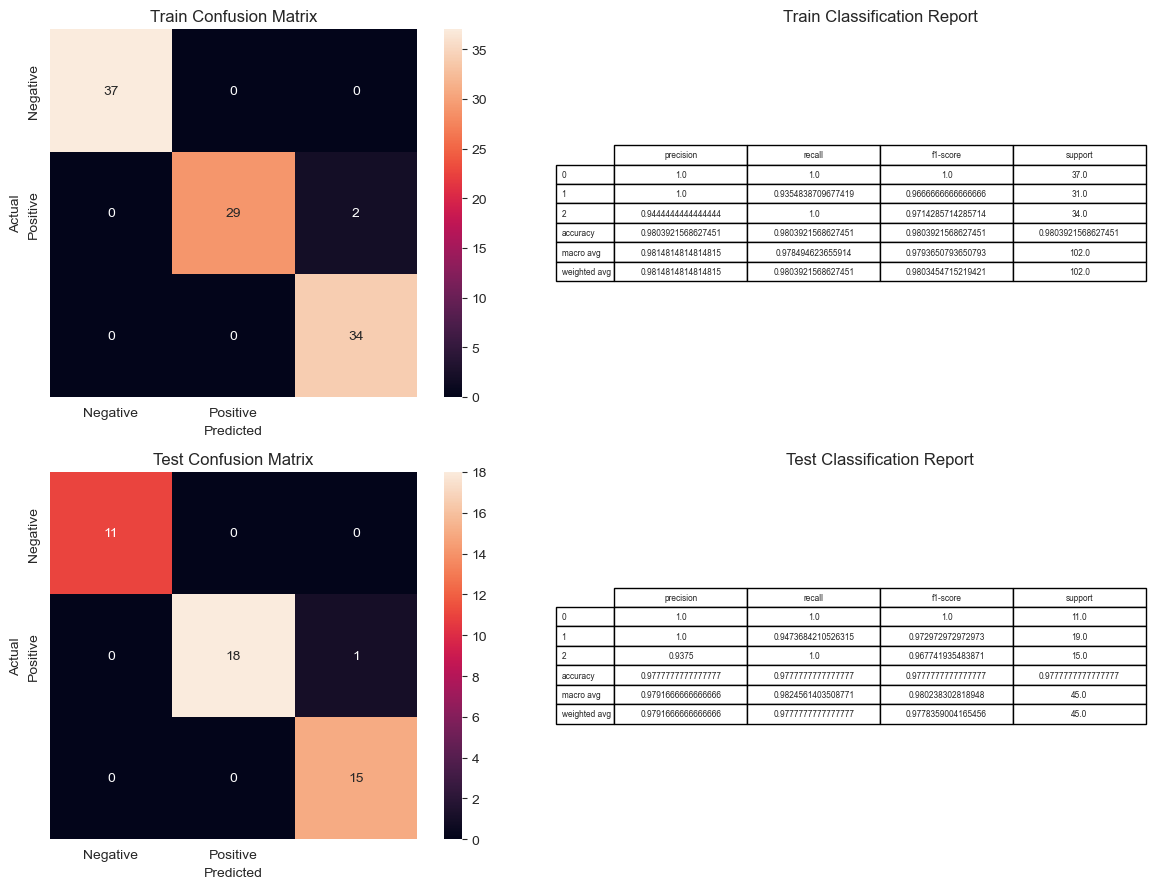

In [85]:
svm_score = implement(svm_model, X_train, X_test, y_train, y_test)

In [86]:
score['SVM'] = svm_score
score

,Logistic Regression,Decision Tree,Random Forest,SVM
Precision Train,0.981481,1.000000,1.000000,0.981481
Precision Test,0.979167,0.979167,0.979167,0.979167
Recall Train,0.980392,1.000000,1.000000,0.980392
Recall Test,0.977778,0.977778,0.977778,0.977778
F1 Train,0.980345,1.000000,1.000000,0.980345
F1 Test,0.977836,0.977836,0.977836,0.977836
Accuracy Train,0.980392,1.000000,1.000000,0.980392
Accuracy Test,0.977778,0.977778,0.977778,0.977778
